In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import flg_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import flg_yolo
import flg_diagnostics

fast_mode = False
if fls.is_submission:
    fast_mode = False

MainProcess


In [2]:
# Prepare datasets
fls.download_kaggle_dataset('jeroencottaar/byu-many-models/', fls.result_dir + '/many_full_res/')

In [3]:
data = fls.dill_load(fls.result_dir + '/many_full_res/Baseline_0M_c36e9856_524 _f.pickle')
data.trained_model.data_after_step2 = []
for d in data.inferred_test_data:
    data.trained_model.data_after_step2.append(d)

In [7]:
ref_data = data.test_data
data.trained_model.step3Output.threshold = 0.05
inferred_data = data.trained_model.infer(data.test_data)

True positives: 203 out of 300
False negatives - seen but not selected: 43 out of 300
False negatives - not seen: 54 out of 300
False positives: 48 out of 50


d:\flagellar/code/core\flg_numerics.py:83: RuntimeWarning: Mean of empty slice
  mean_list = np.nanmean(to_append, axis=(1,2))#extract_patch(d.mean_per_slice, coords[:1], sizes[:1], constant_value=np.nan)
C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


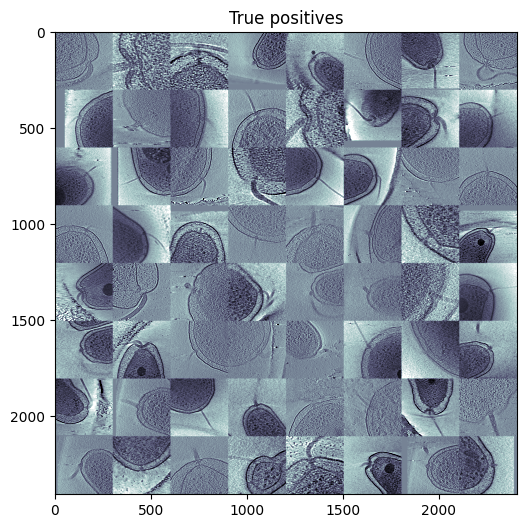

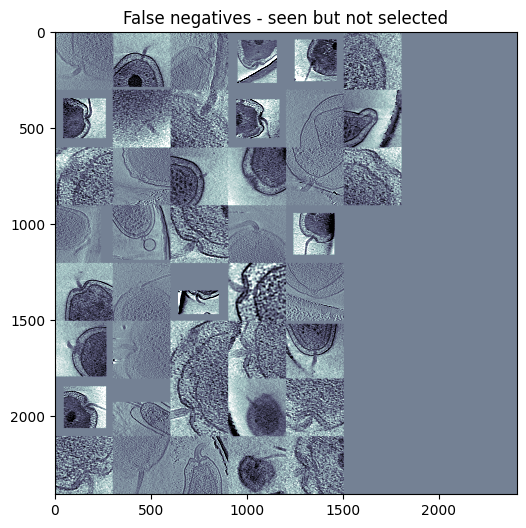

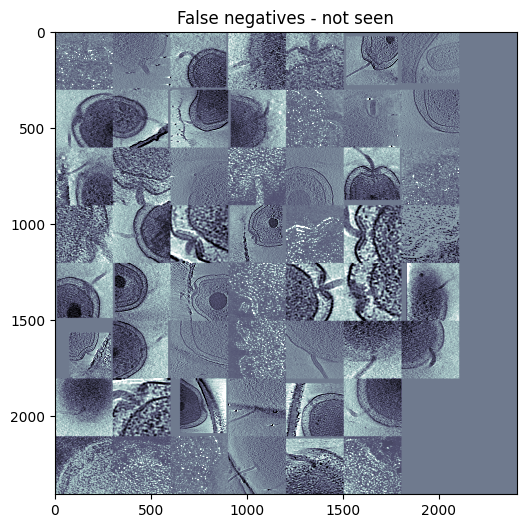

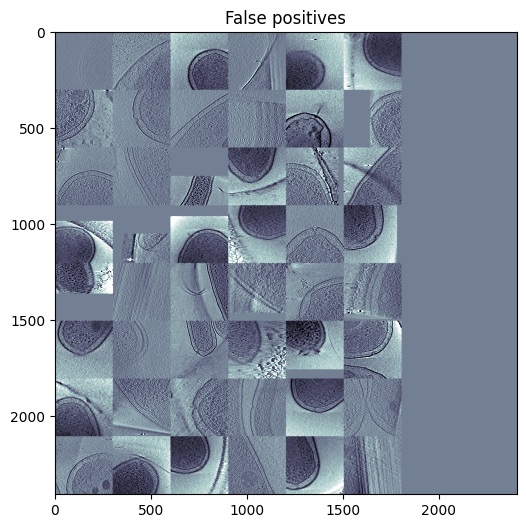

In [8]:
importlib.reload(flg_diagnostics)
flg_diagnostics.show_tf_pn(inferred_data, ref_data)